# 🪻붓꽃 품종 분류

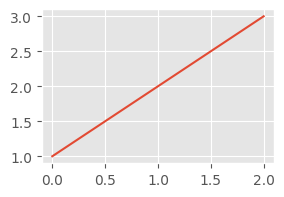

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))
plt.show()  

In [168]:
from sklearn.datasets import load_iris
 
# 붓꽃 데이터 로딩
iris = load_iris()
 
iris.keys()
 
# 독립변수
feature = iris.data
feature_name = iris.feature_names
 
# 종속변수
target = iris.target
target_name = iris.target_names
 
# 데이터프레임 만들기
df_iris = pd.DataFrame(feature, columns=feature_name)
df_iris['species'] = target
df_iris.head()
 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [169]:
df_iris.info() # 데이터프레임 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [170]:
df_iris['species'].value_counts() # 종속변수의 분포 확인

species
0    50
1    50
2    50
Name: count, dtype: int64

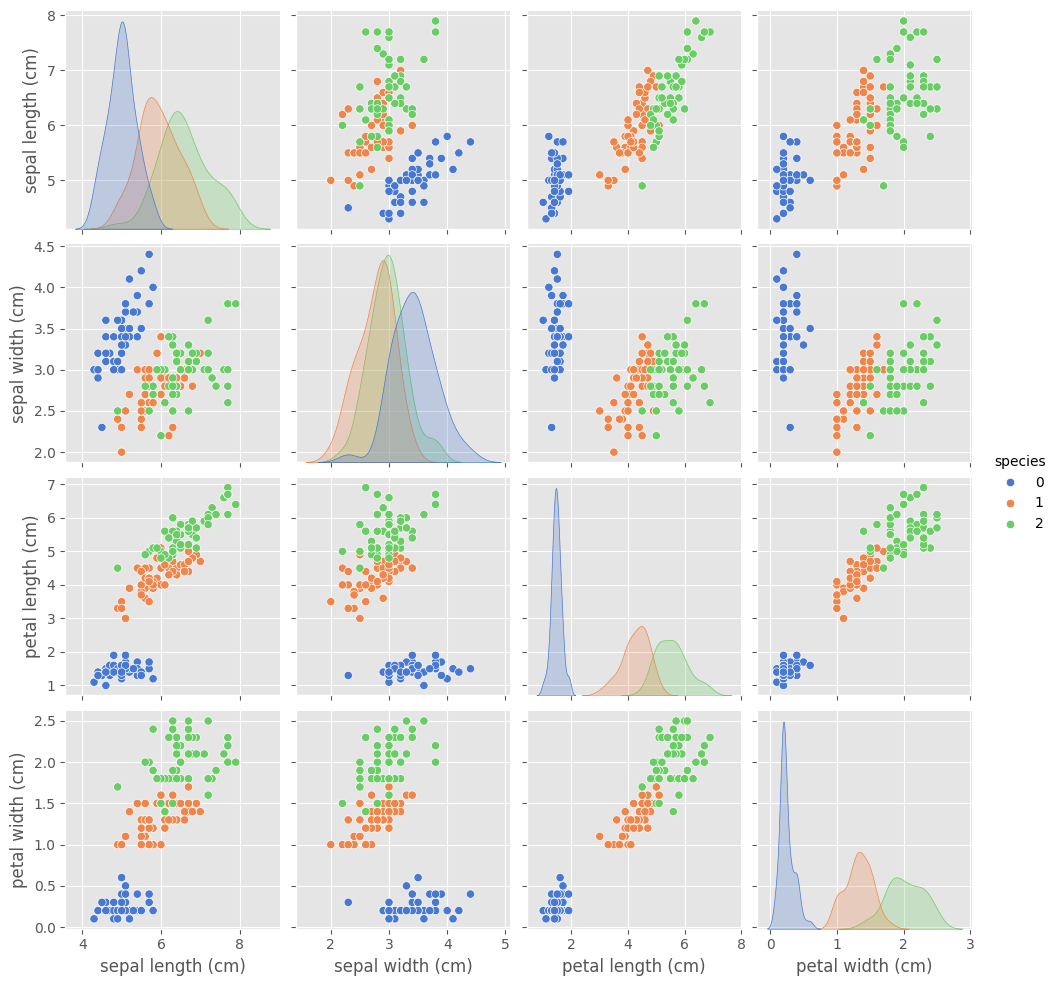

In [171]:
# 산점도로 시각화
sns.pairplot(data = df_iris, hue= 'species', palette='muted') # 산점도 행렬


In [172]:
# 변수 선택
X = feature
y = target

In [195]:
# 데이터 분할
from sklearn.model_selection import train_test_split # 데이터 분할 함수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=444, stratify = y) # 75% 학습용, 25% 검증용 stratify = y는 층화추출

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 데이터 확인

(112, 4) (38, 4) (112,) (38,)


In [196]:
pd.Series(y_train).value_counts() # 학습용 데이터의 종속변수 분포 확인

2    38
0    37
1    37
Name: count, dtype: int64

In [197]:
# 모델 생성 및 훈련
from sklearn.tree import DecisionTreeClassifier # 결정트리
model = DecisionTreeClassifier() # 모델 생성
model.fit(X_train, y_train) # 모델 훈련


DecisionTreeClassifier()

In [198]:
#테스트 데이터로 예측
y_pred = model.predict(X_test) 
print('예측 =', y_pred) # 예측값
print('실제 =', y_test) # 실제값  

예측 = [2 1 2 0 0 0 1 0 0 1 1 0 2 2 1 1 1 1 2 0 1 1 2 2 2 0 1 2 0 0 1 1 0 0 2 2 1
 0]
실제 = [2 1 1 0 0 0 1 0 0 1 1 0 2 2 1 2 1 1 2 0 2 1 2 2 2 0 1 2 0 0 1 1 0 0 2 2 1
 0]


In [199]:
# 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report # 정확도 계산 함수
print(f'예측정확도 >>>', {accuracy_score(y_test, y_pred)}) # 정확도 계산
print(f'민감도 >>>', {recall_score(y_test, y_pred,average="macro")}) # 민감도 계산
print(f'정밀도 >>>', {precision_score(y_test, y_pred,average="macro")}) # 정밀도 계산

print(classification_report(y_test, y_pred)) # 평가지표 출력

예측정확도 >>> {0.9210526315789473}
민감도 >>> {0.9188034188034188}
정밀도 >>> {0.9220779220779222}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      0.92      0.89        13
           2       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



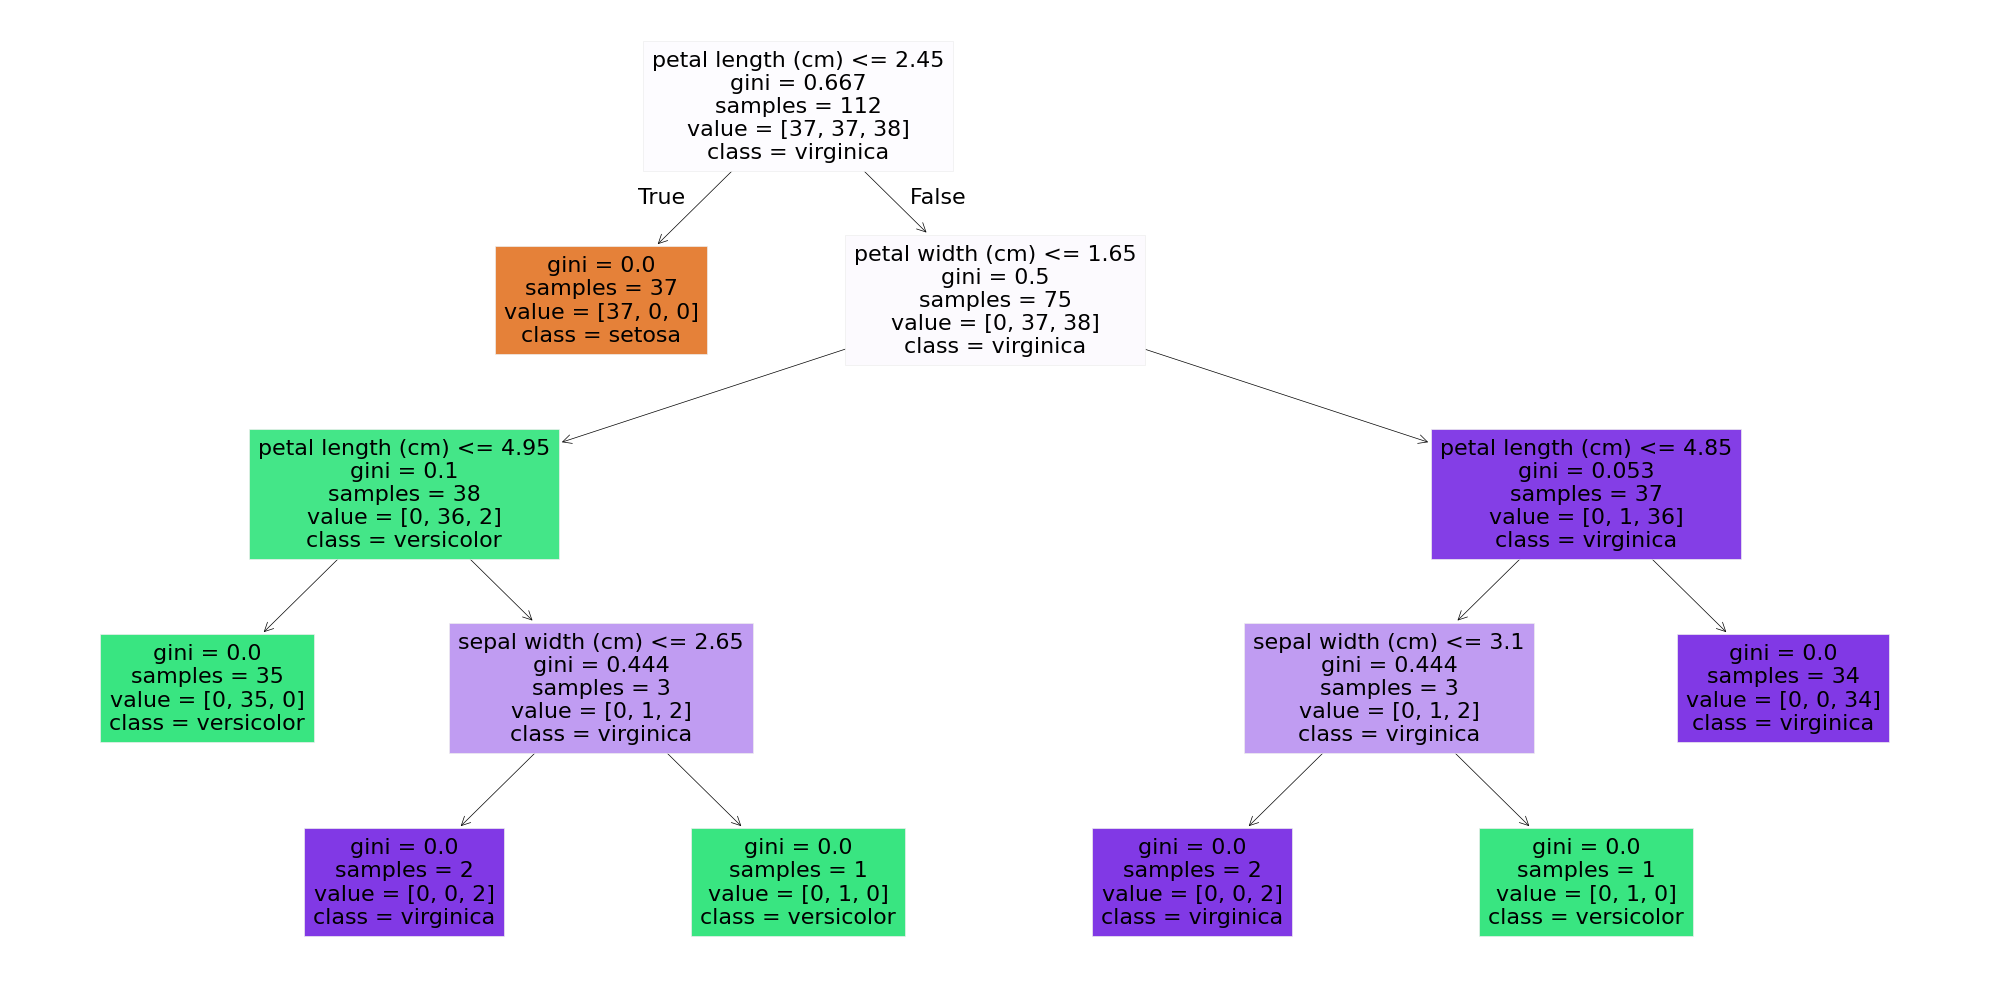

In [200]:
# 트리 시각화
plt.figure(figsize=(20, 10))
from sklearn.tree import plot_tree
plot_tree(model, feature_names=feature_name,
          class_names=target_name,
          filled=True); # 트리 시각화
plt.tight_layout(); # 플롯 간격 조정

특성의 중요도:[0.         0.03571713 0.53891976 0.42536311]


<Axes: >

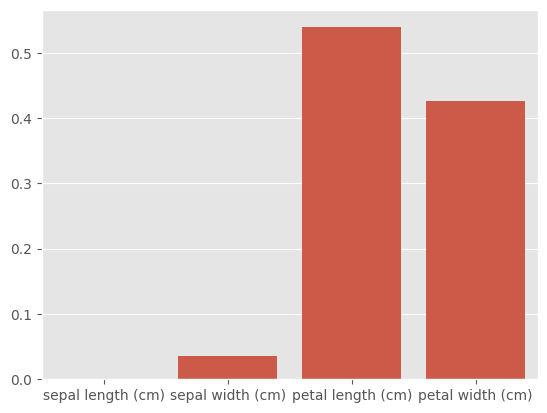

In [201]:
# 특성의 중요도
print(f'특성의 중요도:{model.feature_importances_}') # 특성의 중요도 출력

sns.barplot(x=feature_name, y=model.feature_importances_) # 특성의 중요도 시각화

In [202]:
model.get_depth() # 트리의 깊이

4

In [203]:
from sklearn.model_selection import KFold # KFold 교차검증
kf = KFold(n_splits=5, shuffle=True) # 5겹 교차검증

kf.split(X_train) # 교차검증 데이터셋 생성

<generator object _BaseKFold.split at 0x000002353EC197A0>

In [204]:
for tr_index, val_index in kf.split(X_train):
    print(f'tr_inx:{tr_index}')
    print(f'val_index:{val_index}') # 교차검증 데이터셋 확인


tr_inx:[  0   1   2   3   4   5   6   7   8   9  10  13  14  15  18  19  20  21
  22  23  26  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  48  50  51  52  57  58  59  60  61  62  64  65  66  67  68
  69  70  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  90
  91  92  94  95  96  97  98  99 100 101 103 104 105 106 108 109 111]
val_index:[ 11  12  16  17  24  25  27  28  47  49  53  54  55  56  63  71  77  88
  89  93 102 107 110]
tr_inx:[  1   2   5   6   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  23  24  25  27  28  29  31  32  35  36  38  39  40  41  42  44  45  46
  47  48  49  50  52  53  54  55  56  57  58  59  60  63  64  65  66  67
  68  69  71  72  73  75  77  78  79  80  81  82  83  87  88  89  90  92
  93  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110 111]
val_index:[  0   3   4   7  22  26  30  33  34  37  43  51  61  62  70  74  76  84
  85  86  91  94 109]
tr_inx:[  0   2   3   4   5   6   7   9  10  11  12 

In [205]:
for tr_index, val_index in kf.split(X_train):
    X_tr, y_tr = X_train[tr_index], y_train[tr_index] # 학습용 데이터셋
    X_val, y_val = X_train[val_index], y_train[val_index] # 검증용 데이터셋
    
    model.fit(X_tr, y_tr) # 모델 훈련

    pred = model.predict(X_val) # 검증용 데이터셋으로 예측

    print(f'정확도 >>>', {accuracy_score(y_val, pred)}) # 정확도 계산

정확도 >>> {0.9130434782608695}
정확도 >>> {0.9130434782608695}
정확도 >>> {1.0}
정확도 >>> {1.0}
정확도 >>> {0.9545454545454546}


In [206]:
from sklearn.model_selection import StratifiedKFold # StratifiedKFold 교차검증 = 층화추출
skf = StratifiedKFold(n_splits=5, shuffle=True) # 5겹 층화추출 교차검증

#for tr_index, val_index in skf.split(X_train, y_train):
#    print(f'tr_inx:{tr_index}')
#    print(f'val_index:{val_index}') # 교차검증 데이터셋 확인

cv_scores = [] # 교차검증 정확도 리스트

for tr_index, val_index in skf.split(X_train, y_train):
    X_tr, y_tr = X_train[tr_index], y_train[tr_index] # 학습용 데이터셋
    X_val, y_val = X_train[val_index], y_train[val_index] # 검증용 데이터셋
    
    
    model.fit(X_tr, y_tr) # 모델 훈련
    pred = model.predict(X_val) # 검증용 데이터셋으로 예측
    print(f'정확도 >>>', {accuracy_score(y_val, pred)}) # 정확도 계산
    cv_scores.append(accuracy_score(y_val, pred)) # 정확도 리스트에 추가

    # print('-'*50) # 구분선
    # print(f' tr_index : {tr_index}') # 학습용 데이터셋 인덱스
    # print(f' val_index : {val_index}') # 검증용 데이터셋 인덱스

np.mean(cv_scores) # 교차검증 정확도 평균

정확도 >>> {0.9130434782608695}
정확도 >>> {1.0}
정확도 >>> {0.9545454545454546}
정확도 >>> {0.9545454545454546}
정확도 >>> {0.9090909090909091}


np.float64(0.9462450592885375)

In [207]:
# 최종 평가
pred = model.predict(X_test) # 테스트 데이터셋으로 예측
print(f'예측정확도 >>>', {accuracy_score(y_test, pred)}) # 정확도 계산

예측정확도 >>> {0.9473684210526315}


In [208]:
# croos_val_score
from sklearn.model_selection import cross_val_score # 교차검증 함수
cross_val_score(model, X_train, y_train, cv=5) # 교차검증 정확도 계산


array([0.95652174, 1.        , 1.        , 0.90909091, 0.90909091])

In [209]:
model = DecisionTreeClassifier() # 모델 생성
kf = KFold(n_splits=5, shuffle=True) # 5겹 교차검증

# 하이퍼파라미터 준비
parameters = {'max_depth':[3,4,5], 
            'min_samples_split':[2,4]} # 하이퍼파라미터 후보

# 그리드서치 준비
from sklearn.model_selection import GridSearchCV # 그리드서치 함수
gscv = GridSearchCV(model, param_grid=parameters, cv=kf, refit=True) # 그리드서치 객체 생성


gscv.fit(X_train, y_train) # 그리드서치로 모델 훈련


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

In [214]:
# 그리드서치 결과 확인

gscv.cv_results_ # 결과 확인 (딕셔너리 구조임)

pd.DataFrame(gscv.cv_results_) # (가독성을 위해) 데이터프레임으로 변환

print(f'최적의 하이퍼파라미터 >>>', gscv.best_params_) # 최적의 하이퍼파라미터 출력
print(f'최고성능 정확도 >>>', gscv.best_score_) # 최고성능 정확도 출력
print(f'최고성능 모델 >>>', gscv.best_estimator_) # 최고성능 모델 출력

최적의 하이퍼파라미터 >>> {'max_depth': 3, 'min_samples_split': 4}
최고성능 정확도 >>> 0.9731225296442687
최고성능 모델 >>> DecisionTreeClassifier(max_depth=3, min_samples_split=4)


In [211]:
# 최종 모델
best_model = gscv.best_estimator_ # 최고성능 모델

# 예측
pred = best_model.predict(X_test) # 테스트 데이터셋으로 예측
print(f'예측정확도 >>>', {accuracy_score(y_test, pred)}) # 정확도 계산


예측정확도 >>> {0.9736842105263158}


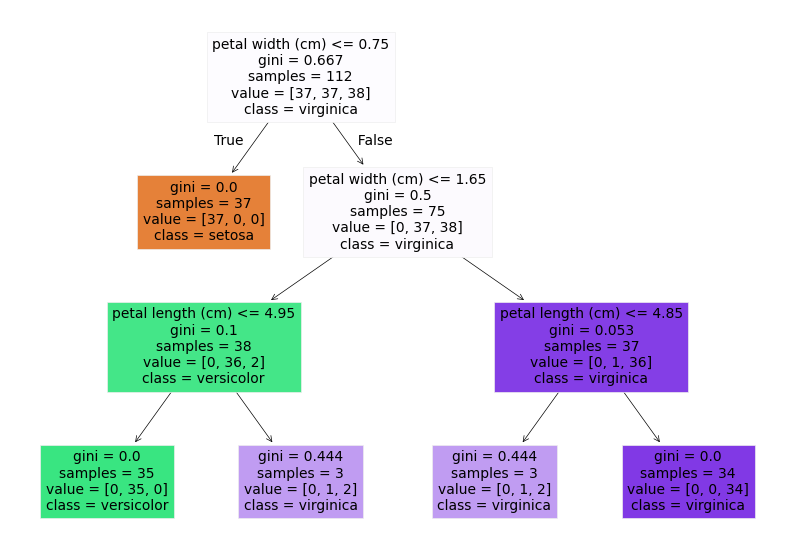

In [217]:
# 시각화
plt.figure(figsize=(10, 7)) # 플롯 사이즈 조정
from sklearn.tree import plot_tree # 트리 시각화 함수
plot_tree(best_model, feature_names=feature_name,
          class_names=target_name,
          filled=True); # 트리 시각화